In [0]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_func(weight, X): 
    
    return 1.0/(1.0 + np.exp(-np.dot(X, weight.T))) 
  
  
def log_gradient(weight, X, y): 
    ''' 
    logistic gradient function 
    '''
    first_calc = logistic_func(weight, X) - y.reshape(X.shape[0], -1) 
    final_calc = np.dot(first_calc.T, X) 
    return final_calc 
  
  
def cost_func(weight, X, y): 
    ''' 
    cost function, J 
    '''
    log_func = logistic_func(weight, X)
    y = np.squeeze(y) 
    step1 = y * np.log(log_func) 
    step2 = (1 - y) * np.log(1 - log_func) 
    final = -step1 - step2 
    return np.mean(final) 
  
  
def grad_desc(X, y, weight, lr=.01, converge_change=.001): 
    ''' 
    gradient descent function 
    '''
    m = len(y)
    cost = cost_func(weight, X, y) 
    change_cost = 1
    num_iter = 1
      
    while(change_cost > converge_change): 
        old_cost = cost 
        weight = weight - (lr * log_gradient(weight, X, y)) 
        cost = cost_func(weight, X, y) 
        change_cost = old_cost - cost 
        num_iter += 1
    return weight, num_iter  


def sg_desc(X, y, weight, lr=0.01, converge_change=0.001):
    m = len(y)
    rand_index = np.random.randint(0, m)
    X_i = X[rand_index, :].reshape(1, X.shape[1])
    Y_i = y[rand_index, :].reshape(1,1)
    
    cost = cost_func(weight, X_i, Y_i)
    change_cost = 1
    num_iter =1
    
    while(change_cost > converge_change):
      old_cost = cost
      weight = weight - (lr * log_gradient(weight, X_i, Y_i))
      X_i = X[rand_index, :].reshape(1, X.shape[1])
      Y_i = y[rand_index, :].reshape(1,1)
      cost = cost_func(weight, X_i, Y_i)
      change_cost = old_cost - cost
      num_iter +=1
   
    return weight, num_iter
  

In [6]:
if __name__ == "__main__": 
    # load the dataset 
    
    x = np.asarray([[1], [2], [3], [4], [5], [6], [7], [8]])
    y = np.asarray([[0], [1], [0], [1], [0], [1], [1], [1]])
     
    # stacking columns wth all ones in feature matrix 
    X = np.hstack((np.matrix(np.ones(x.shape[0])).T, x))
    
    # initialize the weight values 
    weight = np.matrix(np.zeros(X.shape[1])) 
    print(weight)

    # beta values after running gradient descent 
    weight, num_iter = grad_desc(X, y, weight) 
  
    # estimated beta values and number of iterations 
    print("Estimated Regression coefficients:", weight) 
    print("No. of iterations:", num_iter) 

    #For the stochastic_gradient descent
    weight_i, num_iter_i = sg_desc(X, y, weight)
    print("Estimated Regression Coefficients:", weight_i)
    print("No. of iteration:", num_iter_i)

[[0. 0.]]
Estimated Regression coefficients: [[-0.82364531  0.35755046]]
No. of iterations: 195
Estimated Regression Coefficients: [[-1.06946776 -0.37991691]]
No. of iteration: 108


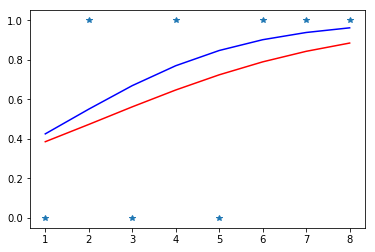

In [8]:
plt.plot(x, y , '*')
k = logistic_func(weight, X)
plt.plot(x, k, 'r')

l = 1.0/(1.0 + np.exp(-0.50314626*x +0.80466545))
plt.plot(x, l, 'b')

In [0]:
-0.79560733  0.55381627

In [0]:
k = 1.0/(1.0 + np.exp(-0.55381627*5 +0.79560733) )

In [0]:
k

0.8779837679004385